We are deciding between two ways of making a comparison between an artifical and biological neural net's responses. The main issue is that one is stochastic and the other is not.

Our two options are:
* Simulate net units as having neural variability: to make the artificial net noisy by adding a comparable amounts of noise as seen in V4.
    * This method entails choosing a neuron like distribution from which to pull net responses.
    * We would take the actual responses as the mean of this neuron-like distribution.
    * Choosing the shape of the distribution is more difficult.
        * Poisson: with Poisson only the mean is needed to parameterize our distribution. An issue with this choice is many units are not all positive in their responses. Another issue is responses of units are not counts. 
        * Gaussian: Since a sum of Poissons starts to look Gaussian, we could just take the mean and SE to create our distributions. Still choosing the SE would entail many choices, do we take average SE or pull from a few cells? 


* Inflate the fit of V4: inflate the quality of the fit of V4 commensurate with a measure of its variability (Pasupathy and Conor 2001)
    * This method entails making an assumption on the distribution of the mean of responses to each shape. From this we could determine on average how much of the variance of a given draw is owing to the expected value of the selectivity versus variance resulting from the distribution about that expected value. 

<h1>Inflate the fit of V4</h1>

The data we will fit is:
$$R_i = \frac{1}{n}\sum_j^n{r_{ij}}$$

Where $j$ indexes the $n$ IID trials of responses to a shape, and $i$ indexes over the $s$ shapes. To begin with we assume the $r$ are $IID$ with $E[r_i]=\mu_i$ and $Var[r_i] = \sigma_i^2$ thus:
$$\frac{\sigma_i^2}{n} = Var[\frac{1}{n}\sum_j^n{r_{ij}}]$$

Eventually we are going to fit the data with a model $x_i$ and we will measure the quality of that fit by the fraction of the variance accounted for by the model. 
$$Unexplained \ Variance = \frac{\sum_i^n{ (R_i - ax_i)^2}}{\sum_i^n{( R_i - \frac{1}{n} \sum_i^n{R_i} )^2}}$$


$$a = \frac{R_i \ x_i}{x_i \ x_i}$$

The numerator here is the error between the least squares fit of the model to the data, and the denominator is the variance of the data. What Pasupathy and Connor do is estimate the fraction of unexplainable variance and subtract it from the unexplained variance.

$$True \ Explained \ Variance = 1 - (Unexplained \ Variance - Unexplainable \ Variance )$$

Now the issue we have to deal with is that for $\sigma>0$ this measure of fit will not go to 1 in expectation. This is because even with a squared error minimizing model $x_i=\mu_i$ there will be some residual variance left over from sampling variability. Furthermore this residual variance increases with $\sigma$ thus even if we were fitting the same neural responses but with different $\sigma$, i.e. greater variability, our fraction of variance accounted for would be systematically biased.

One way to account for this is to adjust our denominator so that it reflects the actual fraction of 'explainable variance'. So we would need to determine how much of the variance in the denominator is the result of $\sigma_i$ then subtract it off. I should not that at the outset this is a bit of a risky proposition, we will not know $\sigma$ and thus will have to estimate it which is difficult from only a few trials.
Lets first determine the value of the denominator in expectation.
The facts we will need to do this are:
* $E[R_i] = \mu_i$
* $Var[R_i] = \sigma_i^2$ where $\sigma_i^2$ was determined from $r_i$
* $E[X^2] = Var[X] + E[X]^2$
* $E[XY] = E[X]E[Y] \ \ (X,Y \  independent)$


$$Var = E[\sum_i^s{( R_i - \frac{1}{s} \sum_g^s{R_g} )^2}]$$

$$= \sum_i^s{E[( R_i - \frac{1}{s} \sum_g^s{R_g} )( R_i - \frac{1}{s} \sum_g^s{R_g} )}]$$

$$= \sum_i^s{E[R_i^2  - \frac{2}{s} R_i\sum_g^s{R_g} + \frac{1}{s^2} \sum_g^s{R_g} \sum_g^s{R_g}]} $$

$$= \sum_i^s{(E[R_i^2]  - \frac{2}{s} E[R_i\sum_g^s{R_g}] + \frac{1}{s^2}E[\sum_g^s{R_g} \sum_g^s{R_g}])} $$

$$= \sum_i^s{E[R_i^2]}  - \frac{2}{s}\sum_i^s{ E[R_i\sum_g^s{R_g}]} + \frac{1}{s^2}\sum_i^s{E[\sum_g^s{R_g} \sum_g^s{R_g}]} $$

Now lets look at each of these terms in turn:

1) 

$$\sum_i^s{E[R_i^2]} $$
$$\sum_i^s{(\sigma_i^2 + \mu_i^2)}$$

2) 

$$- \frac{2}{s}\sum_i^s{ E[R_i\sum_g^s{R_g}]} $$
$$- \frac{2}{s}\sum_i^s{ E[R_i^2 + R_i \sum_{g \neq i}^{s-1}{R_g}]} $$
$$- \frac{2}{s}\sum_i^s{ (\sigma_i^2 + \mu_i^2  + \mu_i \sum_{g \neq i}^{s-1}{\mu_g})} $$
$$- \frac{2}{s}\sum_i^s{ (\sigma_i^2  + \mu_i \sum_{g}^{s}{\mu_g})} $$


3) 

$$\frac{1}{s^2} \sum_i^s{E[\sum_g^s{R_g} \sum_g^s{R_g}]}$$
$$\frac{s}{s^2} \sum_i^s{(\sigma_i^2  + \mu_i \sum_{g}^{s}{\mu_g})}$$
$$\frac{1}{s} \sum_i^s{(\sigma_i^2  + \mu_i \sum_{g}^{s}{\mu_g})}$$

Combining these back together:

$$Var = \sum_i^s{(\sigma_i^2 + \mu_i^2)} - \frac{2}{s}\sum_i^s{ (\sigma_i^2  + \mu_i \sum_{g}^{s}{\mu_g})}  +  \frac{1}{s} \sum_i^s{(\sigma_i^2  + \mu_i \sum_{g}^{s}{\mu_g})}$$

$$= \sum_i^s{(\sigma_i^2 + \mu_i^2)} - \frac{1}{s}\sum_i^s{ (\sigma_i^2  + \mu_i \sum_{g}^{s}{\mu_g})} $$

$$= \sum_i^s{(\sigma_i^2 + \mu_i^2)} - \frac{1}{s}\sum_i^s{(\sigma_i^2 + \mu_i^2  + \mu_i \sum_{g \neq i}^{s-1}{\mu_g})} $$

$$= \sum_i^s{(\sigma_i^2 + \mu_i^2)} - \frac{1}{s}\sum_i^s{(\sigma_i^2 + \mu_i^2)}  - \frac{1}{s} \sum_i^s{(\mu_i \sum_{g \neq i}^{s-1}{\mu_g})} $$

$$= \frac{s-1}{s}\sum_i^s{(\sigma_i^2 + \mu_i^2)}  - \frac{1}{s} \sum_i^s{(\mu_i \sum_{g \neq i}^{s-1}{\mu_g})} $$

$$= \frac{s-1}{s}\sum_i^s{\sigma_i^2} + \frac{s-1}{s}\sum_i^s{\mu_i^2}  - \frac{1}{s} \sum_i^s{(\mu_i \sum_{g \neq i}^{s-1}{\mu_g})} $$

With the noise variance accounted for, the method of Pasupathy and Conor amounts to:

$$\frac{\sum_i^n{ (R_i - ax_i)^2} - \frac{s-1}{s}\sum_i^s{\sigma_i^2}}{Var} $$

We will need to estimate $\sigma^2$ and an unbiased estimator of it is the sample variance:

$$\frac{1}{n-1} \sum_j^n{(r_{ij} - \frac{1}{n}\sum_j^n{r_{ij}})^2} $$

dividing this by n gives us the variance of the mean.
$$\frac{1}{n^2-n} \sum_j^n{(r_{ij} - \frac{1}{n}\sum_j^n{r_{ij}})^2} $$

Lets try this in simulation and see if it is true in expectation, and the kind of variance we see. 
First we want to check how well the formula we found for the denominator holds.

Expected Var(R_i):0.5
Expected Numerator Value 20.0
True Var(R_i):0.500263758566
True Denominator Value:20.01


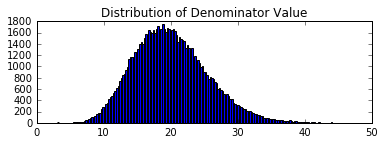

In [128]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 #trials
s = 20 #stimuli
n_exps = 100000 #number simulations
sigma = np.array([5,]*s) # the variance of each trial

#each trial for a stimuli has the same expectation
lambdas = np.cos(np.linspace(0, np.pi, s)) + 1 #s
#our model is not perfect, thus its angle is pi/4 off
model = np.cos(np.linspace(0, np.pi, s) + np.pi/4) + 1 #s

#lets calculate our expectation from the formula derived above
sigma_R = (sigma/n) #averaging trials reduces variance.

# the mean of each entry in our mean stimuli response matrix is the signal variation
mu_cross = (np.expand_dims(lambdas, 0)*np.expand_dims(lambdas, 1))
mu_sqrd_sum = np.sum(mu_cross) - np.trace(mu_cross)
mu_var = ((s-1)/s)*np.sum(lambdas**2) - (1/s)*mu_sqrd_sum

#the noise variance which is independent of the mean variance is added to this
noise_var = ((s-1)/s)*np.sum(sigma_R)
expectation = mu_var + noise_var

print('Expected Var(R_i):' + str(np.mean(sigma_R)))
print('Expected Numerator Value ' + str(np.mean(expectation)))

#r = np.random.poisson(lambdas, size=(n_exps, n, s)) # nx n s
r = np.random.normal(loc=lambdas, scale=np.sqrt(sigma), size=(n_exps, n, s)) # nx n s
R = r.mean(1) # nx s
print('True Var(R_i):' + str(np.mean(np.var(R, 0, ddof=1))))
R_ms = R - R.mean(1, keepdims=True)# nx s
var = np.sum(R_ms**2, 1)
print('True Denominator Value:' + str(np.round(np.mean(var),2)))
ax = plt.subplot(211)
_ = plt.hist(var, bins=200)
_ = plt.title('Distribution of Denominator Value')

Good. Our derived formula is in good agreement with the simulation. I believe this is a chi-squared distribution as in this case it is a sum of squared normal distributions.  

True Fraction Variance Explained: 0.83


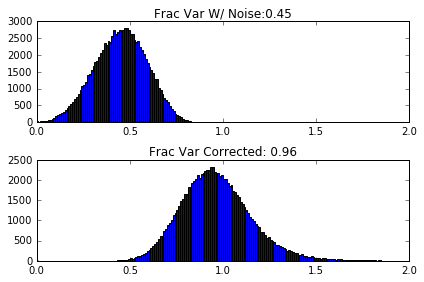

In [81]:
#Now lets try out the correction. 
sighat = np.var(r, axis=1, ddof=1)/n # nx s
correction = np.sum(sighat,1)*((s-1)/s)

model -= model.mean(0)
error = np.linalg.lstsq(np.expand_dims(model,1), R_ms.T)[1] # nx

corrected_error = error - correction
est_true_expl_var = 1-(corrected_error/(var))
#est_true_expl_var[est_true_expl_var>1] = 1
est_true_expl_var_w_noise = 1-(error/var)
ax = plt.subplot(211)
plt.hist(est_true_expl_var_w_noise, range=[0,2], bins=200)
plt.title('Frac Var W/ Noise:' + str(np.round(np.mean(est_true_expl_var_w_noise),2)))

ax = plt.subplot(212)
plt.hist(est_true_expl_var, range=[0,2], bins=200)
plt.title('Frac Var Corrected: '+ str(np.round(np.mean(est_true_expl_var),2)))
plt.tight_layout()

print('True Fraction Variance Explained: ' + str(np.round(np.corrcoef(model, lambdas)[0,1]**2, 2)))


The corrected faction of variance tends to on average be much higher than the true fraction of variance. Geometrically whats going on is that by subtracting the SE noise variance from the error effectively shifts the response vector directly towards the model vector. This correction essentially assumes that the noise variance pushed our vector directly away from the model vector. This is unlikely. 


Essentially we have some expected response vector and we want to know its angle with the model. Unfortunately we only have some samples from the distribution around this response vector. Visually if we are in 3-d our distribution around the expected vector is something spheroid, we can imagine nested cones around the model vector that describe directions with the same angle to the model vector. If we imagine the cone along which our expectation vector lies, the way in which it intersects our spheroid distribution makes it such that there is more probability mass with a greater angle than expectation than a smaller angle. This is why correlation tends to decrease with noise. To make a correction we need to integrate along these cones across the distribution of response vectors, to get the likelihood of any angle, then add the difference between this angle and the expected angle to the angle between a sampled response vector and the model vector. Than in expectation that angle will be the true angle.


Unfortunately we do not know the expected angle nor do I know how to perform this integration. The only way I can think of to continue in this direction is to assume a distributional form of our responses (Poisson) perform a max-likelihood fit then in simulation determine the expected value (might be equivalent to the sample mean?) and the distribution of correlations. With these two we can then calculate a correction. 
While I could validate this method in simulation, it would be nice if we could think of a way to validate it on data...

True Fraction Variance Explained: 0.84


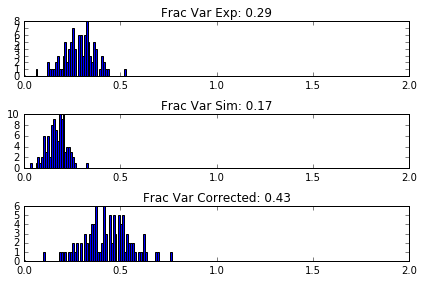

In [125]:
n = 10 #trials
s = 80 #stimuli
n_exps = 100 #number experiments
n_s = 101 # number boot strap simulations
#each trial for a stimuli has the same expectation
lambdas = np.cos(np.linspace(0, np.pi, s)) + 10 #s
#our model is not perfect, thus its angle is pi/4 off
model = np.cos(np.linspace(0, np.pi, s) + np.pi/4) + 10 #s

#simulate n_exps
r = np.random.poisson(lambdas, size=(n_exps, n, s)) # nx n s
#now get the mean of the trials
R = r.mean(1) # nx s

#get the correlations for each of these trials. We are trying to correct this.
R_ms = R - R.mean(1, keepdims=True)# nx s
model_ms = model - np.mean(model);
model_ms /= np.linalg.norm(model_ms)
exp_cor = np.dot(R_ms/np.linalg.norm(R_ms, keepdims=True, axis=1), 
                 np.expand_dims(model_ms, 1))#nx 1

#now using the means of each stimuli get a simulation of experiments
r_est = np.array([np.random.poisson(an_R, size=(n_s, n, s)) for an_R in R])# nx ns n s
R_est = r_est.mean(2) #nx ns s
R_est_ms =  R_est - R_est.mean(2, keepdims=True) #nx ns s
sim_cor = np.array([np.dot(an_R_est_ms/np.linalg.norm(an_R_est_ms, keepdims=True, axis=1),
                 np.expand_dims(model_ms, 1)) 
                    for an_R_est_ms in R_est_ms]) #nx ns

sim_cor_mn = sim_cor.mean(1)
correction_cor = (exp_cor + exp_cor - sim_cor_mn)

ax = plt.subplot(311)
plt.hist(exp_cor**2, range=[0,2], bins=200)
plt.title('Frac Var Exp: '+ str(np.round(np.mean(exp_cor**2),2)))

ax = plt.subplot(312)
plt.hist(sim_cor_mn**2, range=[0,2], bins=200)
plt.title('Frac Var Sim: '+ str(np.round(np.mean(sim_cor_mn**2),2)))



ax = plt.subplot(313)
plt.hist(correction_cor**2, range=[0,2], bins=200)
plt.title('Frac Var Corrected: '+ str(np.round(np.mean(correction_cor**2),2)))
print('True Fraction Variance Explained: ' + 
      str(np.round(np.corrcoef(model, lambdas)[0,1]**2, 2)))

plt.tight_layout()

It would seem the proposed method does not work too well. The problem is that we are calculating our shift in correlation based on an estimate of the expected vector. In high dimensions this estimate vector has a much larger angle with the model vector than the true vector. Thus our correction is being calculated around a vector quite different than the true one. 

Lets step back and think about what we are trying to do. We know that for some distribution around an expected vector sampling from this distribution will give us a smaller correlation value. Looking at variability across trials gives us a sense for what this distribution is. It then remains to be seen what center of this distribution would make the measured correlation value likely.

$$P(\theta \ | \ r_{ij}, \ \hat{\theta}, \ \hat{f})$$

That is given our responses $r_{ij}$ the angle between their mean and our model vector ($\hat{\theta}$) and the assumed parameterized distribution from which $r_{ij}$ was drawn, what is the likelihood of the angle between our responses in expectation and the model vector ($\theta$).

We can attempt to solve this problem using a brute force search and Monte Carlo estimation of likelihood. We first construct a vector that has a $\theta$ we want to know the likelihood of. This could be done by titrating phase randomization of the model vector to the correct $\theta$ or adding in our model vector to our response vector till the correct ($\theta$).
We then place our estimate of the distribution around this vector, sample correlations from it, to build up a distribution of correlations then read off the likelihood of our observed $\hat{\theta}$.
One of the many issues with this method is it assumes the shape of the distribution is independent of its position. While this would be true of a gaussian, it would not be true of a Poisson. Other issues include that it is computationally expensive and only intuitiviely justified. 

<h1>Simulate net units as having neural variability</h1>

Our question is whether AlexNet units can serve as an image computable model of APC tuning. A point of reference is the APC tuning of V4 neurons, these are proof that these computations can be approximated to some degree on images. In principal then if AlexNet can serve as a model of V4 its units should at least match or exceed this degree in a neurons quality as an image computable model of APC. 



In making a comparions between neurons and units, we want to ask if these units had the variability of neurons what kind of fits would we expect or conversely if our neurons had no variability what kind of fit would we expect. We know that variability will nearly always decrease the quality of fits. So if a neuron and a unit get the same fit to a model, we know that in expecation the neuron's fit is better and AlexNet does not actually match. 

One way to make the comparison is include neural like variability in AlexNet. If we do this conservatively (add minimal noise) and AlexNet drops below V4 we can with confidence state that AlexNet is not as good of an image computable model of APC as V4. If we do this liberally and AlexNet remains above V4 we can state with confidence that AlexNet is as good or better as an image computable model of APC.

We now need to determine a method by which we can convincingly add conservative to liberal amounts of noise. 

For a conservative estimate we can take the highest SNR found in a neural experiment and pull from a distribution centered around the response of AlexNet units that matches this SNR. The mean and variance which define the SNR only mildly constrain the shape of this distribution. While ideally we would match the distribution of neural variability (Poisson, Negative Binomial) the nature of the responses in AlexNet make this dubious. Responses in AlexNet can be both positive and negative, whereas neural responses are positive. Responses in AlexNet are continuous whereas neural responses are discrete. Finally the scale of responses in AlexNet is arbitrary, but a Poisson distribution relates variance to the scale of responses. So for example many units have responses less than 1 which modeled as a Poisson distribution would result in a simulation in which most responses are 0.

Because our experimental results are the average of several trials and the sum of independent trials converges on a Gaussian, it is not unreasonable to choose the shape of our distribution to be Gaussian and avoid many of the aformentioned problems.


<h5>SNR</h5>
$$\frac{\sigma^2_{signal}}{\sigma^2_{noise}}$$

Previously we determined the variance of our experiment could be decomposed as such:

$$Var = \frac{s-1}{s}\sum_i^s{\sigma_i^2} + \frac{s-1}{s}\sum_i^s{\mu_i^2}  - \frac{1}{s} \sum_i^s{(\mu_i \sum_{g \neq i}^{s-1}{\mu_g})} $$

plugging this into the formula above:

$$\frac{\sigma^2_{signal}}{\sigma^2_{noise}} = \frac {\frac{s-1}{s}\sum_i^s{\mu_i^2}  - \frac{1}{s} \sum_i^s{(\mu_i \sum_{g \neq i}^{s-1}{\mu_g})}}{\frac{s-1}{s}\sum_i^s{\sigma_i^2}} $$

I'm pretty sure  that numerator reduces to sample variance. We then substitute estimates into these values.
$$\mu_i = R_i = \frac{1}{n}\sum_j^n{r_{ij}}$$

$$\sigma_i^2 = \frac{1}{n^2-n} \sum_j^n{(r_{ij} - \frac{1}{n}\sum_j^n{r_{ij}})^2} $$
$$\sigma^2_{noise} = \sum{\sigma_i^2}$$

Now with our SNR estimate we need to take a given response from AlexNet and determines its distribution to match this SNR. We assume the mean of the distribution are the actual responses thus we know the numerator of the SNR, all that remains is to solve for the scaling of the denominator:
$$ SNR_{neuron} = \frac{\sigma^2_{signal}}{ a \sigma^2_{noise}}$$

$$\frac{\sigma^2_{noise} \ SNR_{neuron}}{\sigma^2_{signal}}  = a $$

where $a$ is the scaling of $\sigma^2_{noise}$ a sum of $\sigma_i^2$.

Thus the form of our AlexNet 'neural-like' distribution will be $N(\mu_i, \  a \ \sigma_i)$. We have still not determined what each $\sigma_i$ should be. One option would be to make them homoscedastic (i.e. all equal) another would be to make them heteroscedastic (i.e. not equal).
Heteroscedascity would be more neural-like given neural responses tend to increase their variance with a higher firing rate, and neurons tend to have higher responses to some stimuli than others. Given that higher responses tend to have more leverage on a least squares fit their variance would be more damaging to a model fit. It might be reasonable then to make the comparison more fair by scaling the variance to the means. 

$$\sigma_{i \ scaled}^2 = b \ \mu_i $$

where in this case $\mu_i$ is the actual response of AlexNet. 


In [ ]:
#heteroscedsacity and correlation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 10 #trials
s = 20 #stimuli
n_exps = 100000 #number simulations
sigma = np.array([5,]*s) # the variance of each trial

#each trial for a stimuli has the same expectation
lambdas = np.cos(np.linspace(0, np.pi, s)) + 1 #s
#our model is not perfect, thus its angle is pi/4 off
model = np.cos(np.linspace(0, np.pi, s) + np.pi/4) + 1 #s

print('Expected Var(R_i):' + str(np.mean(sigma_R)))
print('Expected Numerator Value ' + str(np.mean(expectation)))

#r = np.random.poisson(lambdas, size=(n_exps, n, s)) # nx n s
r = np.random.normal(loc=lambdas, scale=np.sqrt(sigma), size=(n_exps, s)) # nx n s
R = r.mean(1) # nx s
print('True Var(R_i):' + str(np.mean(np.var(R, 0, ddof=1))))
R_ms = R - R.mean(1, keepdims=True)# nx s
var = np.sum(R_ms**2, 1)
print('True Denominator Value:' + str(np.round(np.mean(var),2)))
ax = plt.subplot(211)
_ = plt.hist(var, bins=200)
_ = plt.title('Distribution of Denominator Value')